<a href="https://colab.research.google.com/github/Arsh-e-Barin-Khurshid/CodexCue-Software-Solutions-Task-1-Simple-Linear-Regression-on-Tips-ML/blob/main/Simple_Linear_Regression_on_Tips_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

In [2]:
# Load the dataset
df = pd.read_csv('/content/tips.csv')

In [3]:
# Display first few rows of the dataset
print(df.head())

   total_bill   tip     sex smoker  day    time  size
0       16.99  1.01  Female     No  Sun  Dinner     2
1       10.34  1.66    Male     No  Sun  Dinner     3
2       21.01  3.50    Male     No  Sun  Dinner     3
3       23.68  3.31    Male     No  Sun  Dinner     2
4       24.59  3.61  Female     No  Sun  Dinner     4


In [4]:
# Check for missing values
print(df.isnull().sum())

total_bill    0
tip           0
sex           0
smoker        0
day           0
time          0
size          0
dtype: int64


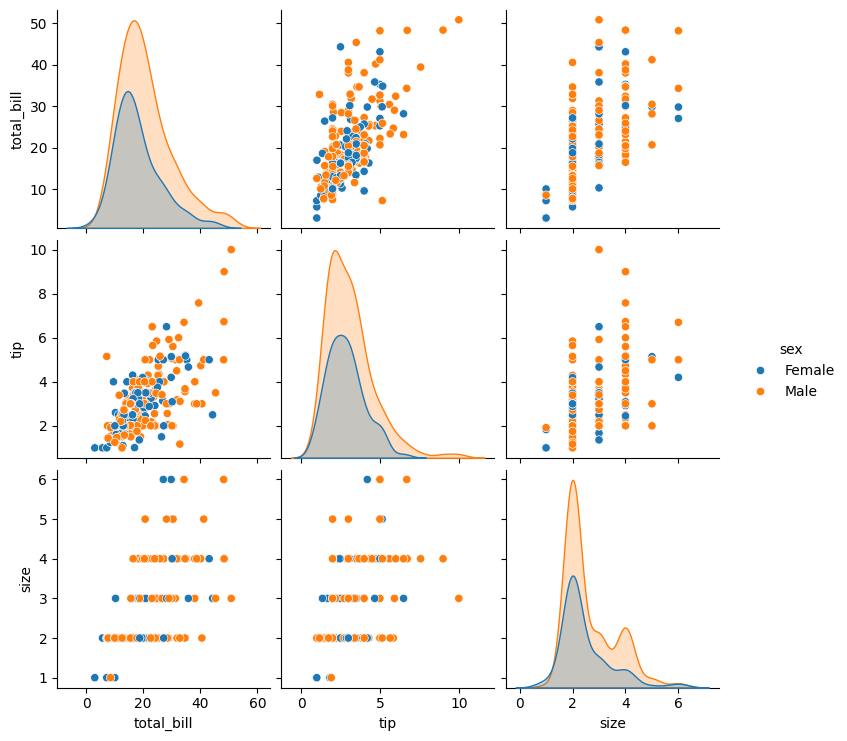

In [5]:
# Pairplot: Displays relationships and distributions between features, color-coded by 'sex'
sns.pairplot(df, hue='sex')
plt.show()

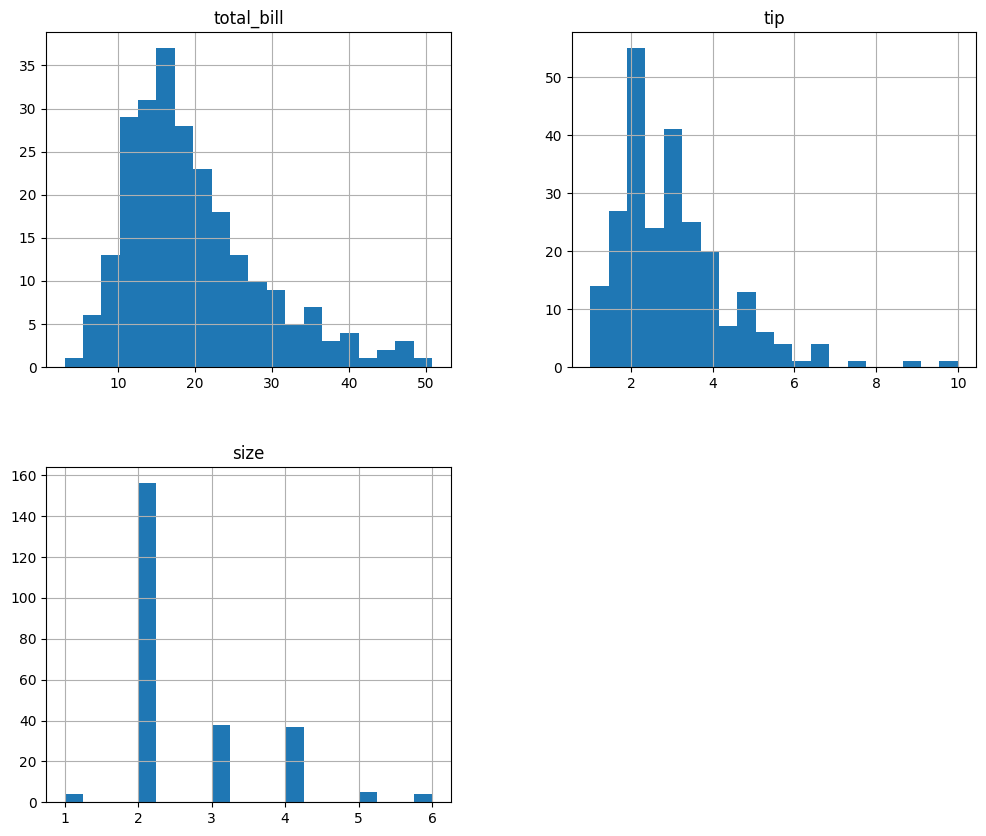

In [6]:
# Histograms: Distribution of each feature
df.hist(bins=20, figsize=(12, 10))
plt.show()

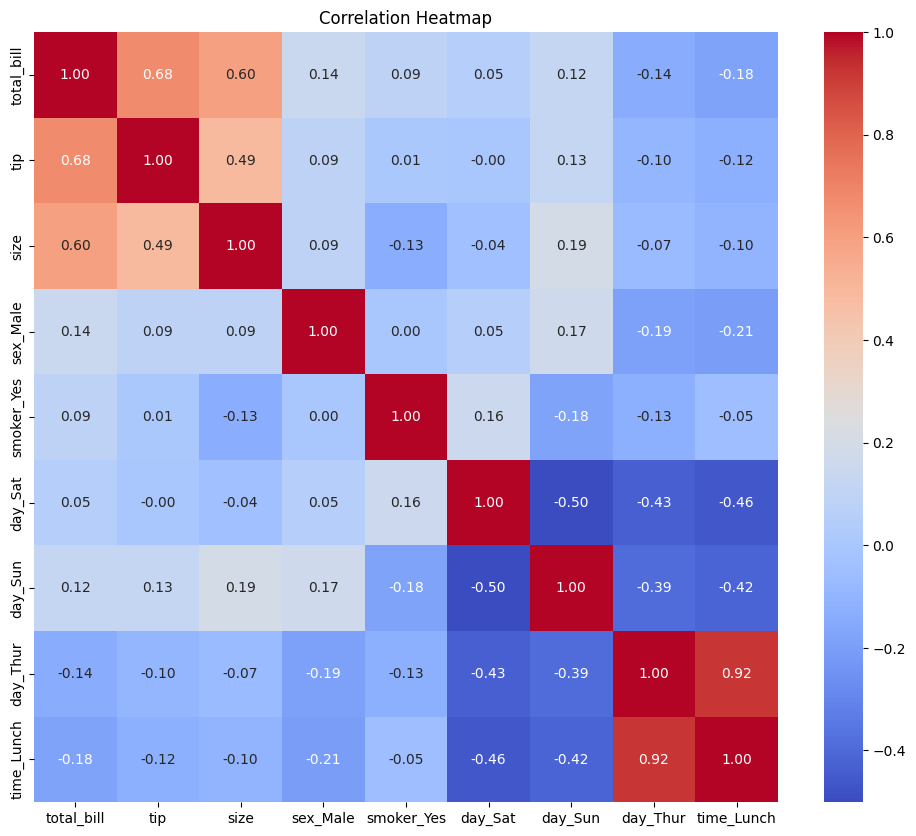

In [7]:
# Convert categorical variables to numeric using one-hot encoding
df_encoded = pd.get_dummies(df, columns=['sex', 'smoker', 'day', 'time'], drop_first=True)

# Calculate correlation matrix for numeric data only
corr_matrix = df_encoded.corr()

# Correlation Heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", fmt='.2f')
plt.title('Correlation Heatmap')
plt.show()

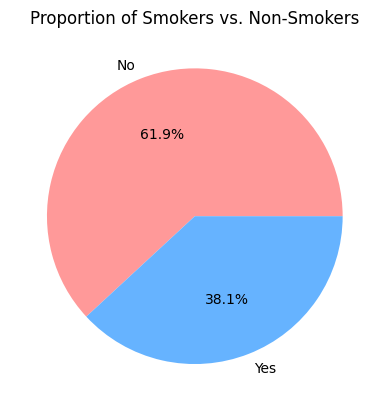

In [8]:
# Pie Chart: Proportion of smokers vs. non-smokers
smoker_counts = df['smoker'].value_counts()
plt.pie(smoker_counts, labels=smoker_counts.index, autopct='%1.1f%%', colors=['#ff9999','#66b3ff'])
plt.title('Proportion of Smokers vs. Non-Smokers')
plt.show()

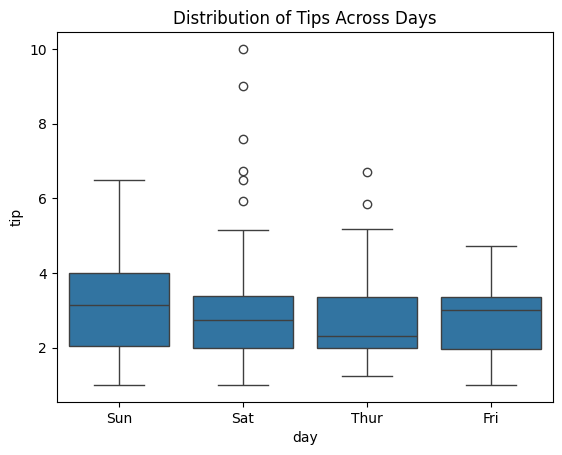

In [9]:
# Boxplot: Distribution of tips across different days
sns.boxplot(x='day', y='tip', data=df)
plt.title('Distribution of Tips Across Days')
plt.show()

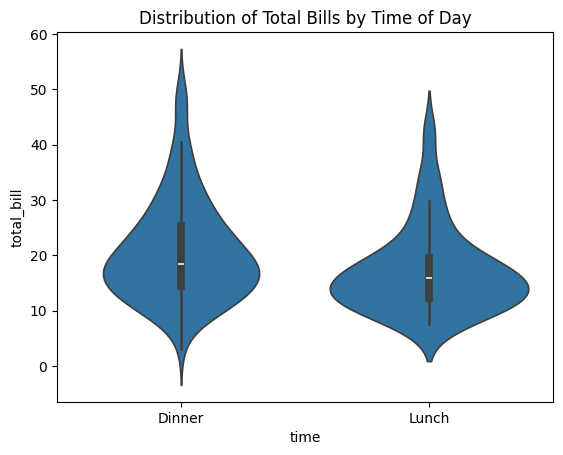

In [10]:
# Violin Plot: Distribution of total bills by time of day
sns.violinplot(x='time', y='total_bill', data=df)
plt.title('Distribution of Total Bills by Time of Day')
plt.show()

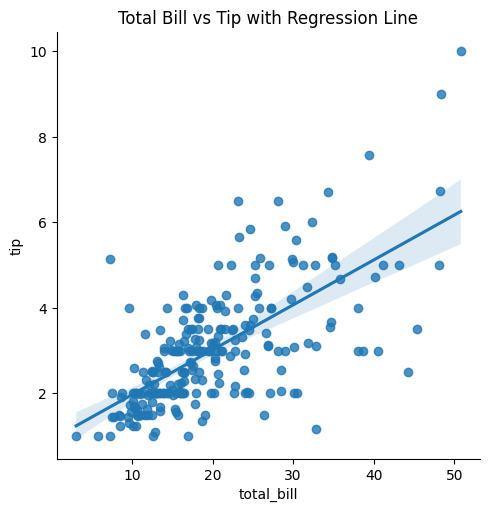

In [11]:
# Scatter Plot with Regression Line: Total Bill vs Tip
sns.lmplot(x='total_bill', y='tip', data=df)
plt.title('Total Bill vs Tip with Regression Line')
plt.show()

In [12]:
# Prepare data for model building
X = df[['total_bill', 'size', 'sex', 'smoker', 'day', 'time']]
y = df['tip']

In [13]:
# Feature Encoding
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), ['total_bill', 'size']),
        ('cat', OneHotEncoder(), ['sex', 'smoker', 'day', 'time'])
    ])

In [14]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [15]:
# Create pipeline for Polynomial Features and Random Forest Regressor
pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('poly_features', PolynomialFeatures(degree=2)),
    ('model', RandomForestRegressor(random_state=42))
])

In [16]:
# Hyperparameter tuning with GridSearchCV
params = {
    'model__n_estimators': [50, 100, 200],
    'model__max_depth': [None, 10, 20, 30],
    'model__min_samples_split': [2, 5, 10]
}

grid_search = GridSearchCV(pipeline, params, cv=5, scoring='neg_mean_squared_error')
grid_search.fit(X_train, y_train)

print(f'Best Parameters: {grid_search.best_params_}')
print(f'Best Cross-Validation Score: {-grid_search.best_score_}')

Best Parameters: {'model__max_depth': 10, 'model__min_samples_split': 10, 'model__n_estimators': 100}
Best Cross-Validation Score: 1.2779362415586668


In [17]:
# Best model and predictions
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)

In [18]:
# Model evaluation
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f'Mean Squared Error: {mse}')
print(f'R-squared: {r2}')

Mean Squared Error: 0.970162390267556
R-squared: 0.22385229554536668


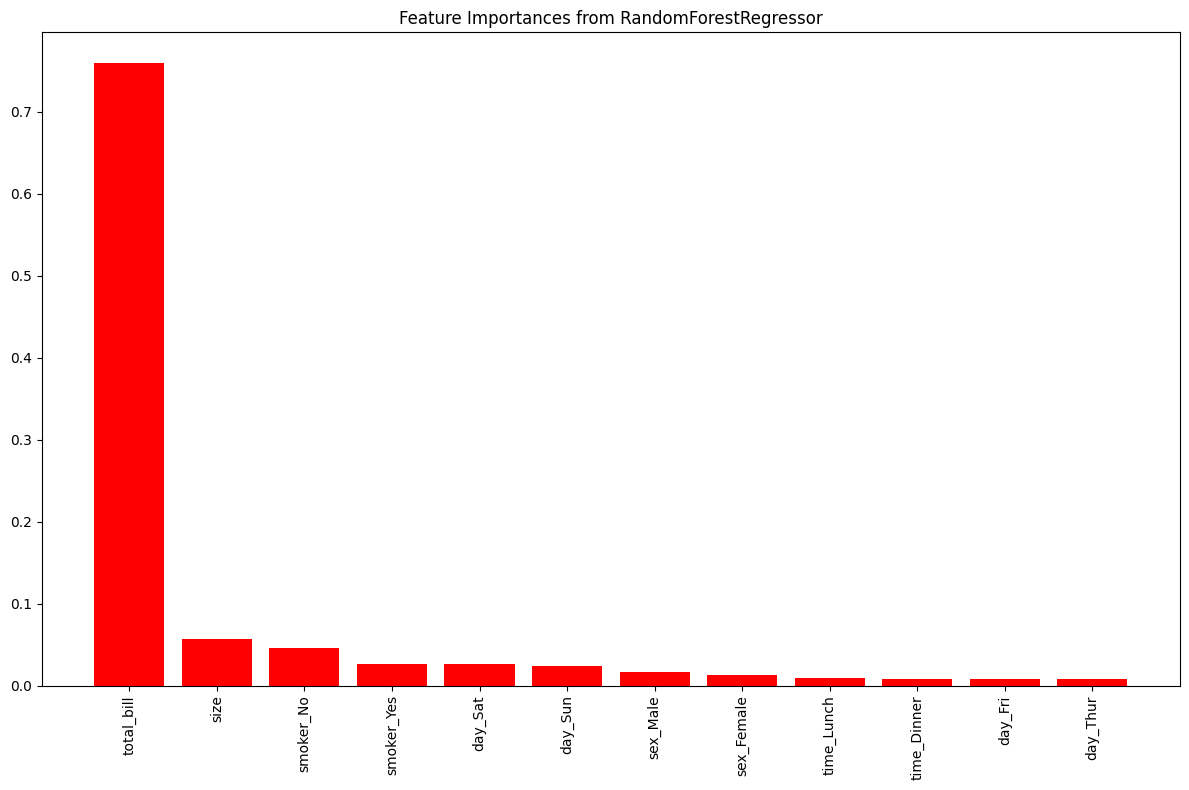

In [19]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.compose import ColumnTransformer
from sklearn.ensemble import RandomForestRegressor
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

# Load your data
df = pd.read_csv('/content/tips.csv')

# Define your features and target
X = df.drop(columns='tip')  # Drop target column
y = df['tip']  # Target column

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define preprocessor and model pipeline
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), ['total_bill', 'size']),
        ('cat', OneHotEncoder(), ['sex', 'smoker', 'day', 'time'])
    ])

best_model = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('model', RandomForestRegressor(n_estimators=100, random_state=42))
])

# Fit the model
best_model.fit(X_train, y_train)

# Extract feature importances from the trained model
importances = best_model.named_steps['model'].feature_importances_

# Extract feature names after preprocessing
num_features = ['total_bill', 'size']
cat_feature_names = best_model.named_steps['preprocessor'].transformers_[1][1].get_feature_names_out()
cat_features = np.array(cat_feature_names)
features = np.concatenate([num_features, cat_features])

# Ensure the length of features matches the length of importances
if len(features) != len(importances):
    print(f"Length mismatch. Investigate the preprocessing and feature extraction steps.")
else:
    # Sort feature importances
    indices = np.argsort(importances)[::-1]

    # Plot feature importances
    plt.figure(figsize=(12, 8))
    plt.title("Feature Importances from RandomForestRegressor")
    plt.bar(range(len(importances)), importances[indices], color="r", align="center")
    plt.xticks(range(len(importances)), np.array(features)[indices], rotation=90)
    plt.xlim([-1, len(importances)])
    plt.tight_layout()
    plt.show()


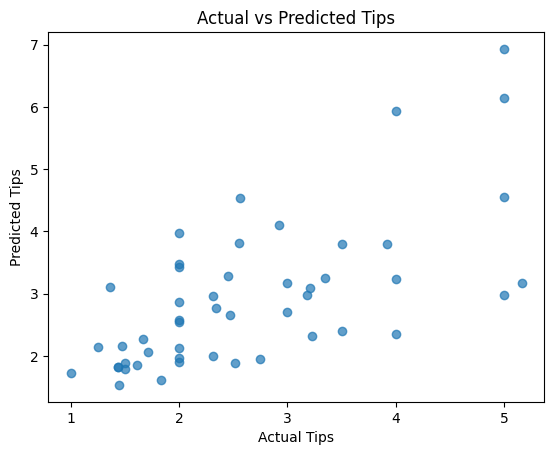

In [20]:
# Visualize predicted vs actual values
plt.scatter(y_test, y_pred, alpha=0.7)
plt.xlabel("Actual Tips")
plt.ylabel("Predicted Tips")
plt.title("Actual vs Predicted Tips")
plt.show()

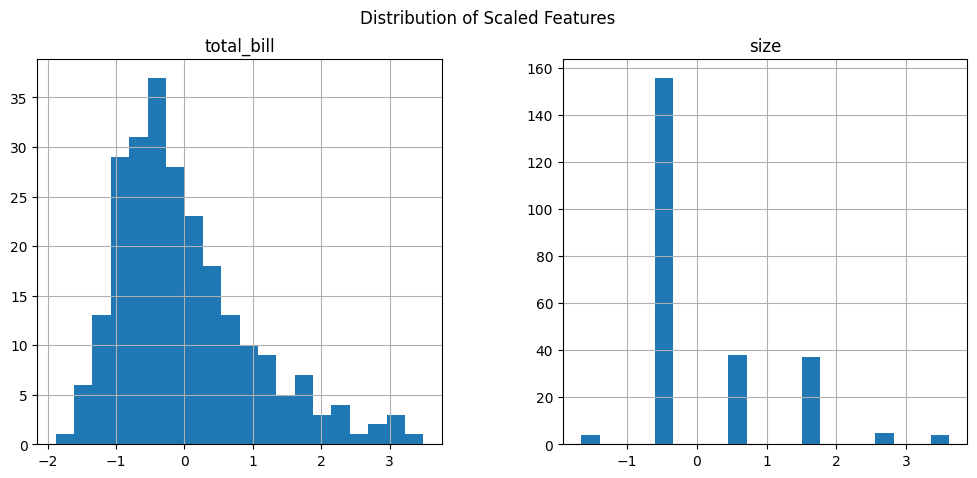

In [21]:
# Feature Scaling: Distribution of scaled features
scaler = StandardScaler()
scaled_features = scaler.fit_transform(df[['total_bill', 'size']])
scaled_df = pd.DataFrame(scaled_features, columns=['total_bill', 'size'])
scaled_df.hist(bins=20, figsize=(12, 5))
plt.suptitle('Distribution of Scaled Features')
plt.show()

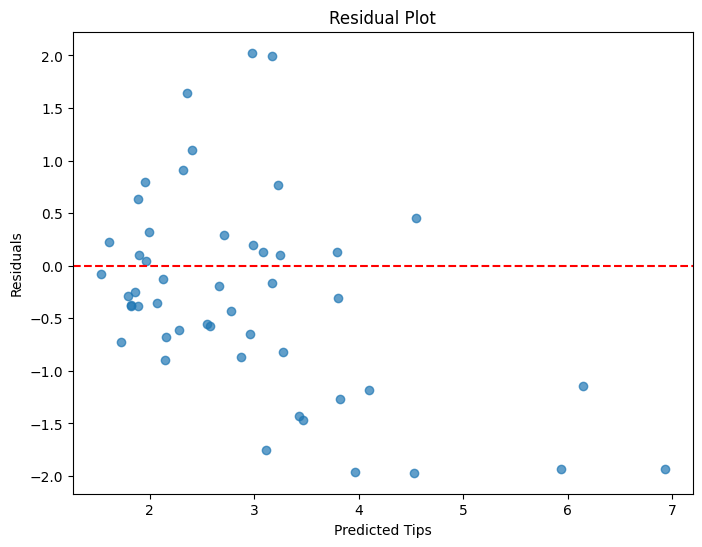

In [22]:
# Residual Plot: Errors vs. Predicted Values
residuals = y_test - y_pred
plt.figure(figsize=(8, 6))
plt.scatter(y_pred, residuals, alpha=0.7)
plt.axhline(0, color='red', linestyle='--')
plt.xlabel("Predicted Tips")
plt.ylabel("Residuals")
plt.title("Residual Plot")
plt.show()

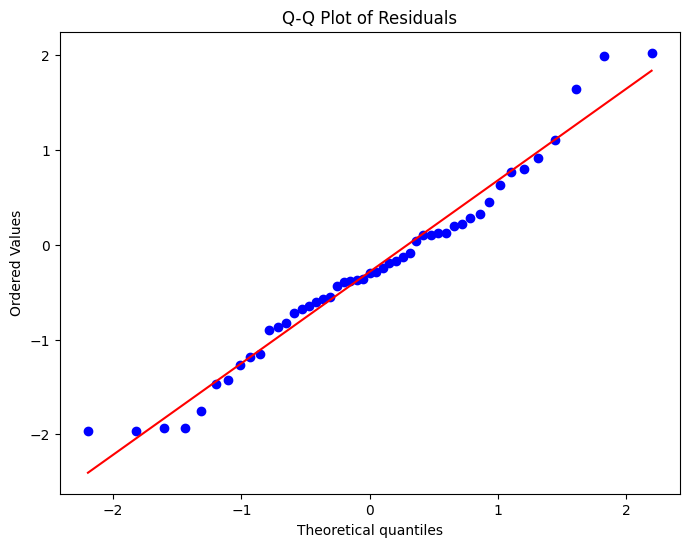

In [23]:
# Q-Q Plot: Check for normality of residuals
import scipy.stats as stats
plt.figure(figsize=(8, 6))
stats.probplot(residuals, dist="norm", plot=plt)
plt.title("Q-Q Plot of Residuals")
plt.show()

<ipython-input-24-1de046b56f50>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='sex', y='tip', data=df, palette='Set2')


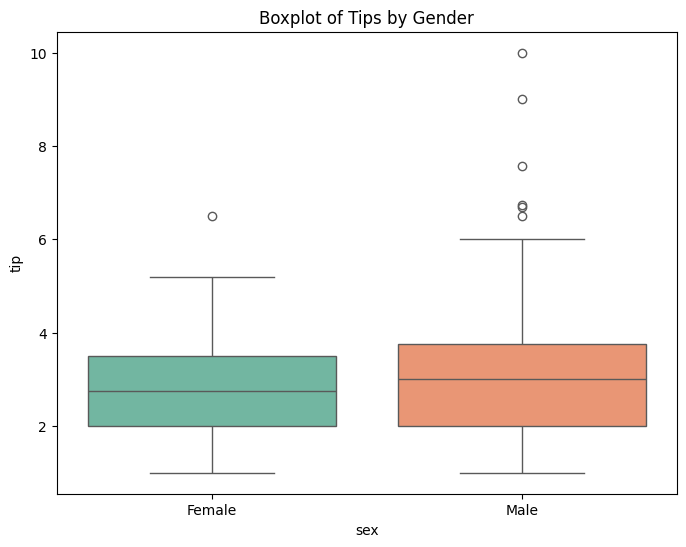

In [24]:
# Boxplot of Tips by Gender
plt.figure(figsize=(8, 6))
sns.boxplot(x='sex', y='tip', data=df, palette='Set2')
plt.title('Boxplot of Tips by Gender')
plt.show()

<ipython-input-25-f434c6c9d046>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x='sex', y='tip', data=df, palette='Set2')


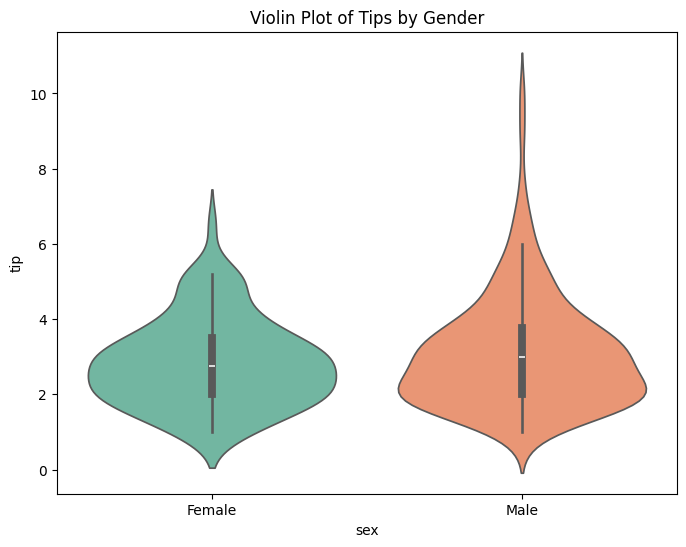

In [25]:
# Violin Plot of Tips by Gender
plt.figure(figsize=(8, 6))
sns.violinplot(x='sex', y='tip', data=df, palette='Set2')
plt.title('Violin Plot of Tips by Gender')
plt.show()

<ipython-input-26-44842d29a3ca>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='sex', y='tip', data=avg_tips_by_gender, palette='Set2')


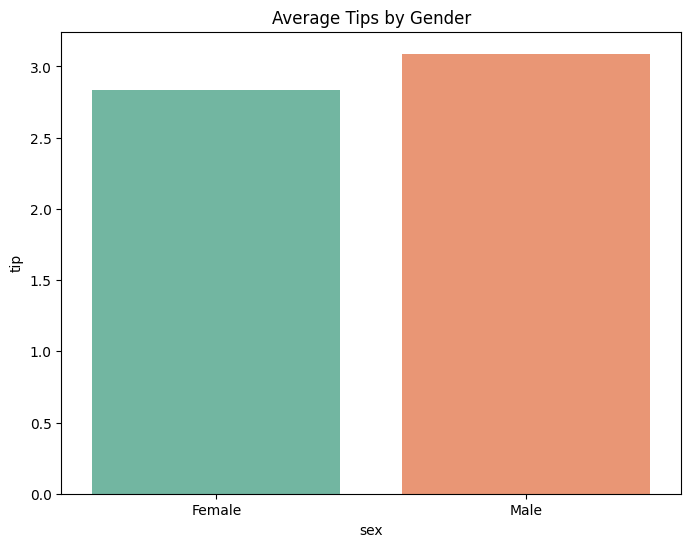

In [26]:
# Bar Plot of Average Tips by Gender
plt.figure(figsize=(8, 6))
avg_tips_by_gender = df.groupby('sex')['tip'].mean().reset_index()
sns.barplot(x='sex', y='tip', data=avg_tips_by_gender, palette='Set2')
plt.title('Average Tips by Gender')
plt.show()

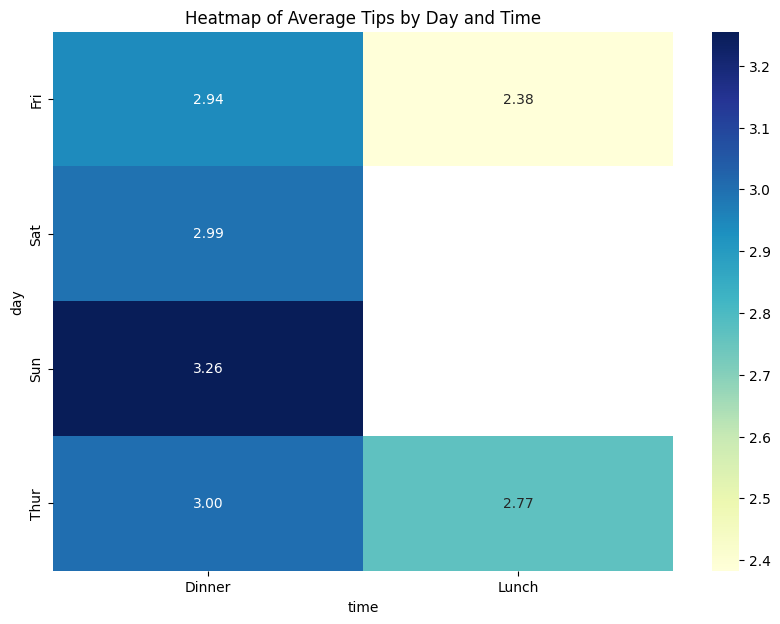

In [27]:
# Heatmap of Average Tips by Day and Time
avg_tips_by_day_time = df.groupby(['day', 'time'])['tip'].mean().unstack()
plt.figure(figsize=(10, 7))
sns.heatmap(avg_tips_by_day_time, annot=True, cmap="YlGnBu", fmt=".2f")
plt.title('Heatmap of Average Tips by Day and Time')
plt.show()

<ipython-input-28-6d290529b395>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='sex', y='tip', data=total_tips_by_gender, palette='Set2')


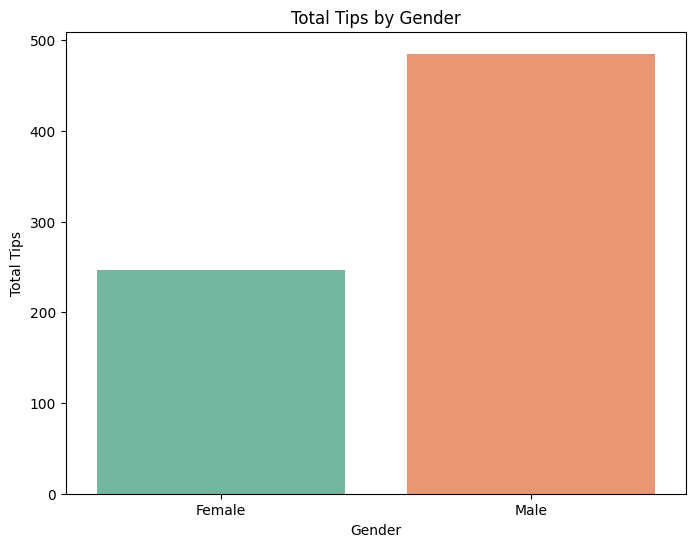

<ipython-input-28-6d290529b395>:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='sex', y='tip', data=avg_tips_by_gender, palette='Set2')


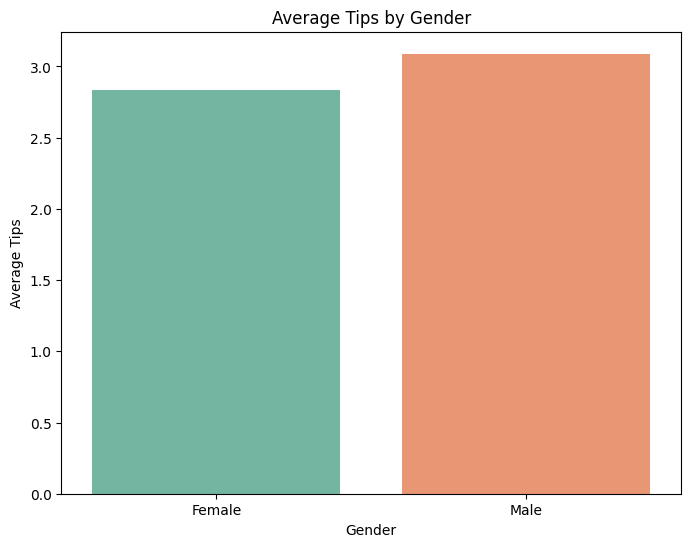

In [28]:
# Calculate total and average tips by gender
total_tips_by_gender = df.groupby('sex')['tip'].sum().reset_index()
avg_tips_by_gender = df.groupby('sex')['tip'].mean().reset_index()

# Bar Plot of Total Tips by Gender
plt.figure(figsize=(8, 6))
sns.barplot(x='sex', y='tip', data=total_tips_by_gender, palette='Set2')
plt.title('Total Tips by Gender')
plt.xlabel('Gender')
plt.ylabel('Total Tips')
plt.show()

# Bar Plot of Average Tips by Gender
plt.figure(figsize=(8, 6))
sns.barplot(x='sex', y='tip', data=avg_tips_by_gender, palette='Set2')
plt.title('Average Tips by Gender')
plt.xlabel('Gender')
plt.ylabel('Average Tips')
plt.show()


<ipython-input-29-da290e56079d>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='day', y='tip', data=total_tips_by_day, palette='Set2')


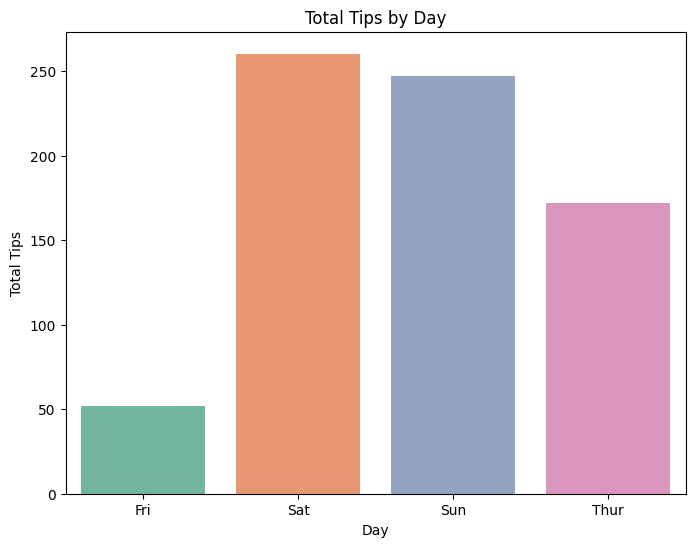

<ipython-input-29-da290e56079d>:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='day', y='tip', data=avg_tips_by_day, palette='Set2')


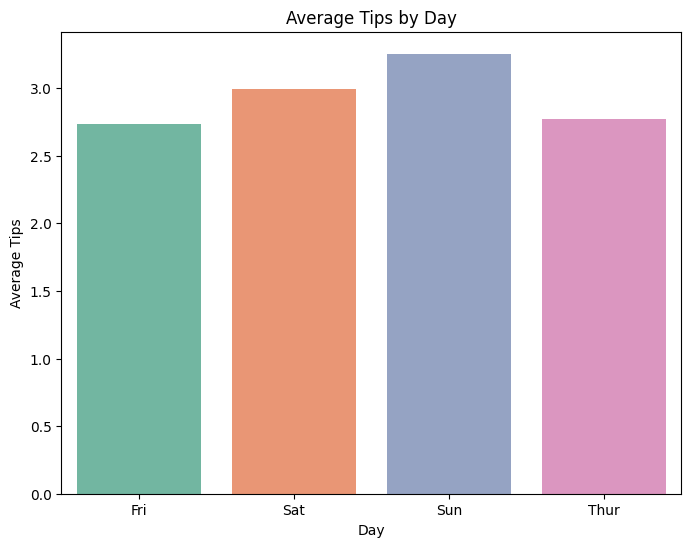

In [29]:
# Calculate total and average tips by day
total_tips_by_day = df.groupby('day')['tip'].sum().reset_index()
avg_tips_by_day = df.groupby('day')['tip'].mean().reset_index()

# Bar Plot of Total Tips by Day
plt.figure(figsize=(8, 6))
sns.barplot(x='day', y='tip', data=total_tips_by_day, palette='Set2')
plt.title('Total Tips by Day')
plt.xlabel('Day')
plt.ylabel('Total Tips')
plt.show()

# Bar Plot of Average Tips by Day
plt.figure(figsize=(8, 6))
sns.barplot(x='day', y='tip', data=avg_tips_by_day, palette='Set2')
plt.title('Average Tips by Day')
plt.xlabel('Day')
plt.ylabel('Average Tips')
plt.show()


<ipython-input-30-1b7fd6ccc14a>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='time', y='tip', data=total_tips_by_time, palette='Set2')


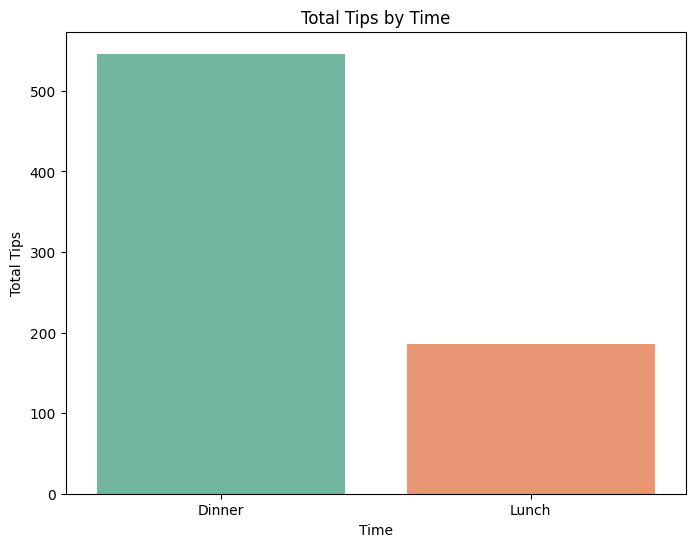

<ipython-input-30-1b7fd6ccc14a>:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='time', y='tip', data=avg_tips_by_time, palette='Set2')


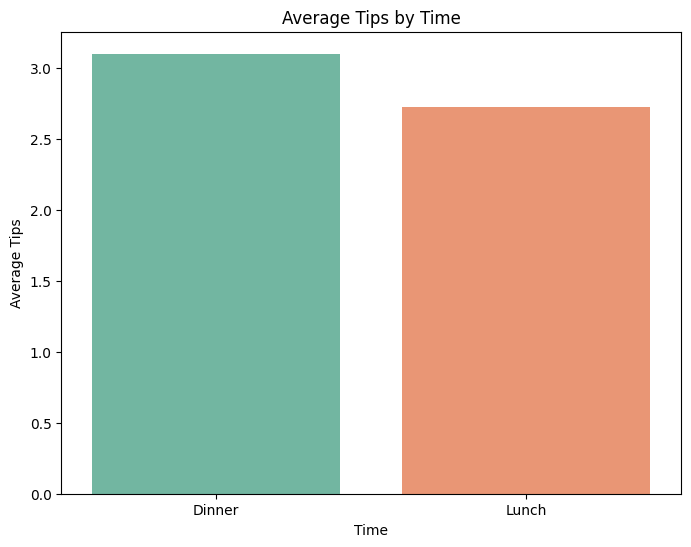

In [30]:
# Calculate total and average tips by time
total_tips_by_time = df.groupby('time')['tip'].sum().reset_index()
avg_tips_by_time = df.groupby('time')['tip'].mean().reset_index()

# Bar Plot of Total Tips by Time
plt.figure(figsize=(8, 6))
sns.barplot(x='time', y='tip', data=total_tips_by_time, palette='Set2')
plt.title('Total Tips by Time')
plt.xlabel('Time')
plt.ylabel('Total Tips')
plt.show()

# Bar Plot of Average Tips by Time
plt.figure(figsize=(8, 6))
sns.barplot(x='time', y='tip', data=avg_tips_by_time, palette='Set2')
plt.title('Average Tips by Time')
plt.xlabel('Time')
plt.ylabel('Average Tips')
plt.show()


<ipython-input-31-c328ba58ab90>:27: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-darkgrid')
<ipython-input-31-c328ba58ab90>:30: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='sex', y='tip', data=total_tips_by_gender, palette='Set2', ax=axes[0, 0])
<ipython-input-31-c328ba58ab90>:35: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='sex', y='tip', data=avg_tips_by_gender, palette='Set2', ax=axes[0, 1])
<ipython-input-31-c328ba58ab90>:40: 

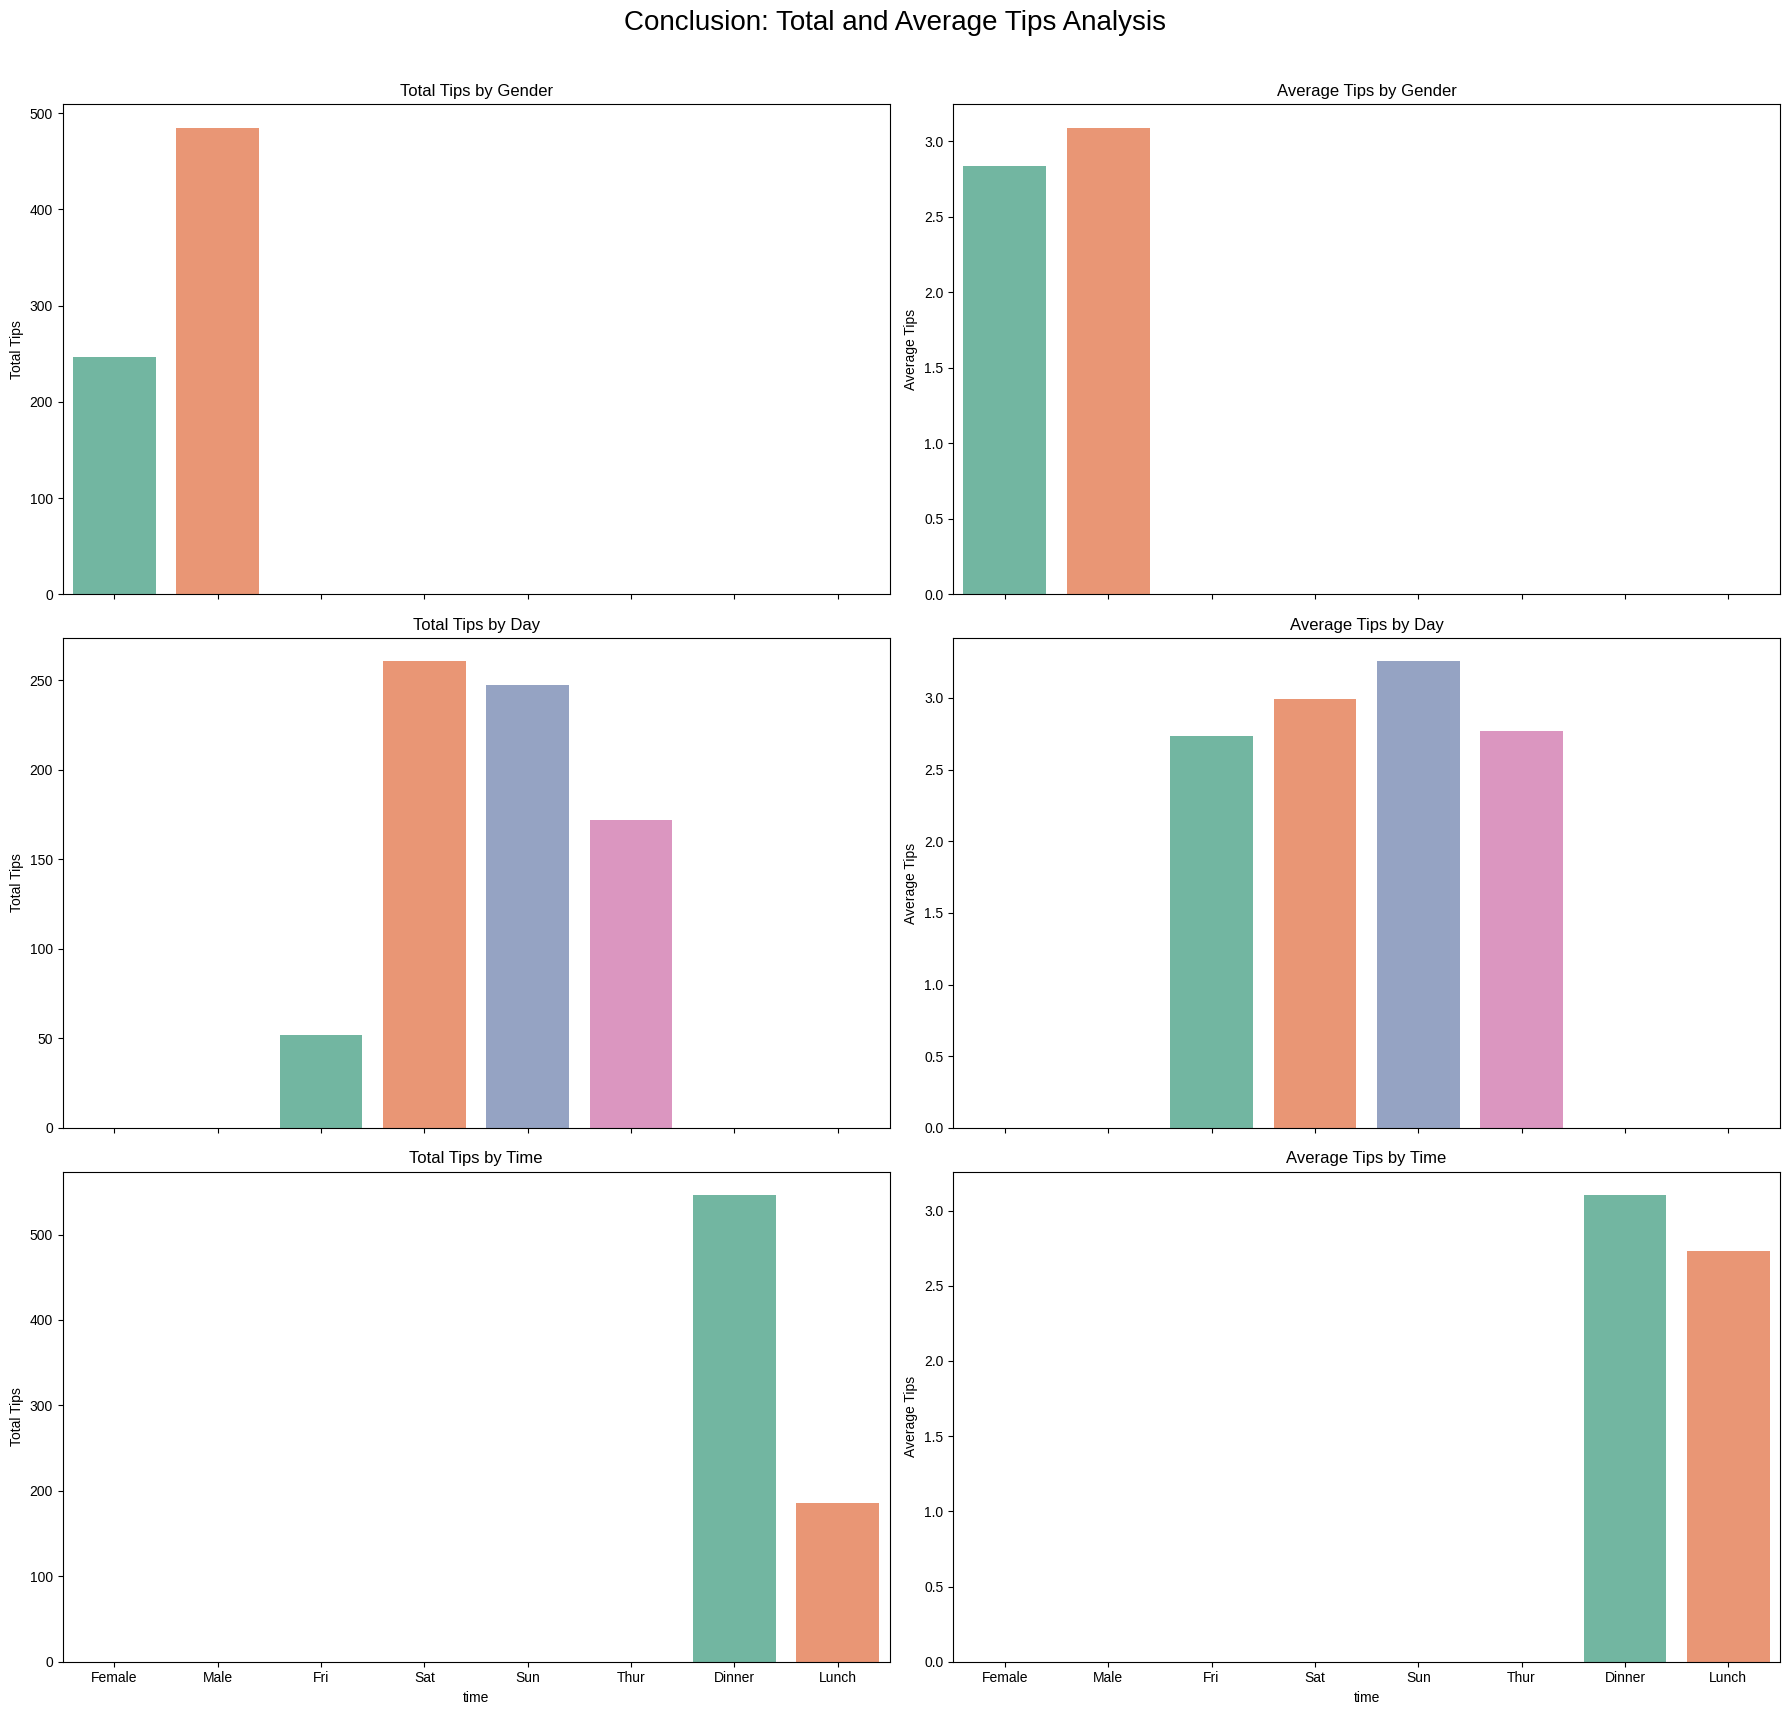

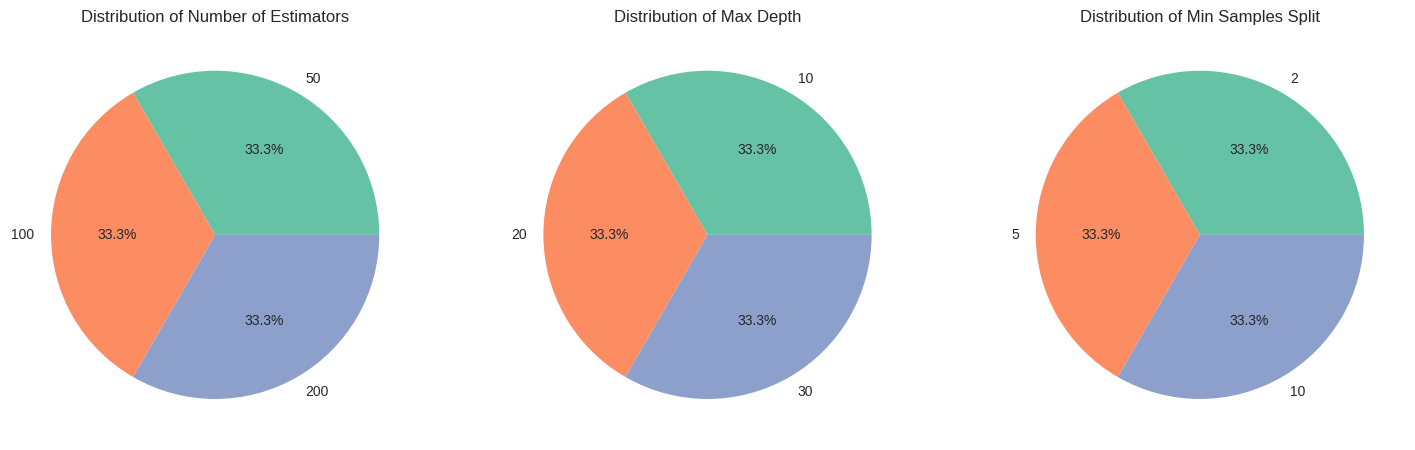

In [31]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, PolynomialFeatures, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.metrics import mean_squared_error, r2_score

# Load the dataset
df = pd.read_csv('/content/tips.csv')

# Calculate total and average tips by gender, day, and time
total_tips_by_gender = df.groupby('sex')['tip'].sum().reset_index()
avg_tips_by_gender = df.groupby('sex')['tip'].mean().reset_index()
total_tips_by_day = df.groupby('day')['tip'].sum().reset_index()
avg_tips_by_day = df.groupby('day')['tip'].mean().reset_index()
total_tips_by_time = df.groupby('time')['tip'].sum().reset_index()
avg_tips_by_time = df.groupby('time')['tip'].mean().reset_index()

# Create a figure with subplots
fig, axes = plt.subplots(3, 2, figsize=(18, 18), sharex='col')
fig.suptitle('Conclusion: Total and Average Tips Analysis', fontsize=20)

# Use a different style
plt.style.use('seaborn-darkgrid')

# Total Tips by Gender
sns.barplot(x='sex', y='tip', data=total_tips_by_gender, palette='Set2', ax=axes[0, 0])
axes[0, 0].set_title('Total Tips by Gender')
axes[0, 0].set_ylabel('Total Tips')

# Average Tips by Gender
sns.barplot(x='sex', y='tip', data=avg_tips_by_gender, palette='Set2', ax=axes[0, 1])
axes[0, 1].set_title('Average Tips by Gender')
axes[0, 1].set_ylabel('Average Tips')

# Total Tips by Day
sns.barplot(x='day', y='tip', data=total_tips_by_day, palette='Set2', ax=axes[1, 0])
axes[1, 0].set_title('Total Tips by Day')
axes[1, 0].set_ylabel('Total Tips')

# Average Tips by Day
sns.barplot(x='day', y='tip', data=avg_tips_by_day, palette='Set2', ax=axes[1, 1])
axes[1, 1].set_title('Average Tips by Day')
axes[1, 1].set_ylabel('Average Tips')

# Total Tips by Time
sns.barplot(x='time', y='tip', data=total_tips_by_time, palette='Set2', ax=axes[2, 0])
axes[2, 0].set_title('Total Tips by Time')
axes[2, 0].set_ylabel('Total Tips')

# Average Tips by Time
sns.barplot(x='time', y='tip', data=avg_tips_by_time, palette='Set2', ax=axes[2, 1])
axes[2, 1].set_title('Average Tips by Time')
axes[2, 1].set_ylabel('Average Tips')

# Adjust layout
plt.tight_layout(rect=[0, 0.03, 1, 0.97])
plt.show()

# Hyperparameter tuning with GridSearchCV (for demonstration)
X = df[['total_bill', 'size', 'sex', 'smoker', 'day', 'time']]
y = df['tip']

# Feature Encoding
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), ['total_bill', 'size']),
        ('cat', OneHotEncoder(), ['sex', 'smoker', 'day', 'time'])
    ])

pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('poly_features', PolynomialFeatures(degree=2)),
    ('model', RandomForestRegressor(random_state=42))
])

params = {
    'model__n_estimators': [50, 100, 200],
    'model__max_depth': [None, 10, 20, 30],
    'model__min_samples_split': [2, 5, 10]
}

grid_search = GridSearchCV(pipeline, params, cv=5, scoring='neg_mean_squared_error')
grid_search.fit(X, y)

# Extract hyperparameter tuning results
results = pd.DataFrame(grid_search.cv_results_)
mean_test_scores = results['mean_test_score']
param_combinations = results[['param_model__n_estimators', 'param_model__max_depth', 'param_model__min_samples_split']]

# Plot pie charts for hyperparameter tuning results
fig, axes = plt.subplots(1, 3, figsize=(18, 6))

# Pie chart for number of estimators
n_estimators_counts = param_combinations['param_model__n_estimators'].value_counts()
axes[0].pie(n_estimators_counts, labels=n_estimators_counts.index, autopct='%1.1f%%', colors=plt.get_cmap('Set2').colors)
axes[0].set_title('Distribution of Number of Estimators')

# Pie chart for max depth
max_depth_counts = param_combinations['param_model__max_depth'].value_counts()
axes[1].pie(max_depth_counts, labels=max_depth_counts.index, autopct='%1.1f%%', colors=plt.get_cmap('Set2').colors)
axes[1].set_title('Distribution of Max Depth')

# Pie chart for min samples split
min_samples_split_counts = param_combinations['param_model__min_samples_split'].value_counts()
axes[2].pie(min_samples_split_counts, labels=min_samples_split_counts.index, autopct='%1.1f%%', colors=plt.get_cmap('Set2').colors)
axes[2].set_title('Distribution of Min Samples Split')

plt.show()
